

## Imports

In [1]:
from numpy.random import seed 
seed(888)

from tensorflow import set_random_seed
set_random_seed(404)

C:\Users\Kanav\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Kanav\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Kanav\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Kanav\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [63]:
%load_ext tensorboard

import numpy as np
import os
import tensorflow as tf
import keras

from keras.datasets import cifar10
from IPython.display import display
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from keras.callbacks import TensorBoard
from time import strftime

from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Constants

In [55]:
LOG_DIR='tensorboard_cifar_logs/'


LABEL_NAMES=['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
IMAGE_WIDTH=32
IMAGE_HEIGHT=32
IMAGE_PIXELS=IMAGE_HEIGHT*IMAGE_WIDTH
COLOR_CHANNELS=3
TOTAL_INPUTS= IMAGE_PIXELS*COLOR_CHANNELS
VALIDATION_SIZE=10000
SMALL_TRAIN_SIZE=1000
NR_CLASSES=10

## Fetch Data

In [4]:
## CIFAR 10 is an iamge dataset used for image recognition models
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

## Exploring the Data

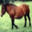

7

In [5]:
pic = array_to_img(x_train_all[7])
display(pic)

y_train_all[7][0]

In [6]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

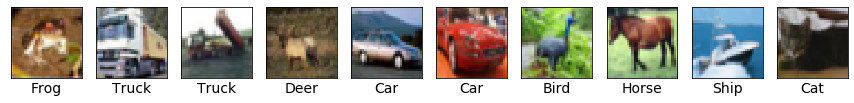

In [7]:
plt.figure(figsize=(15,5))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_all[i])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=14)
plt.show()

In [8]:
x_train_all.shape

(50000, 32, 32, 3)

In [9]:
num_images, x, y, c = x_train_all.shape
print(f'images = {num_images},\t | width = {x}\t | height = {y}\t | channels = {c}')

images = 50000,	 | width = 32	 | height = 32	 | channels = 3


In [10]:
x_test.shape

(10000, 32, 32, 3)

## Preprocess Data

In [11]:
x_train_all=x_train_all/255.0
x_test=x_test/255.0

In [12]:
type(x_train_all[0][0][0][0])

numpy.float64

In [13]:
x_train_all=x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [14]:
x_test=x_test.reshape(x_test.shape[0], TOTAL_INPUTS)
print(f'Shape of the x_test is {x_test.shape}')

Shape of the x_test is (10000, 3072)


In [15]:
## we shall make a validation dataset from the training dataset, to make the model better, 

## Create validation dataset

In [16]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
y_val.shape

(10000, 1)

In [17]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
y_train.shape

(40000, 1)

### Creating smaller dataset (for illustration)

In [18]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

## Defining Network Using Keras

In [27]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name = 'm1_hidden1'),
    Dense(units=64, activation='relu', name = 'm1_hidden2'),
    Dense(units=16, activation='relu', name = 'm1_hidden3'),
    Dense(units=10, activation='softmax', name = 'm1_output')
])

model_1.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
model_2 = Sequential()
model_2.add(Dropout(rate=0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(16, activation='relu', name='m2_hidden3'))
model_2.add(Dense(10, activation='softmax', name='m2_output'))

model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
model_3 = Sequential()
model_3.add(Dropout(rate=0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128, activation='relu', name='m2_hidden1'))
model_3.add(Dropout(rate=0.25, seed=42))
model_3.add(Dense(64, activation='relu', name='m2_hidden2'))
model_3.add(Dense(16, activation='relu', name='m2_hidden3'))
model_3.add(Dense(10, activation='softmax', name='m2_output'))

model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [22]:
## How did this number come
(3072*128 + 128) + (128*64+64) + (64*16+16) + (16*10 + 10)

402810

## Tesnsorboard (Visualising Learning)

In [23]:
def get_tensor_board(model_name):
    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths=os.path.join(LOG_DIR, folder_name)
    try:
        os.makedirs(dir_paths)
    except FileExistsError as e:
        print(str(e))
    else:
        print('Successfully created directory')

    return TensorBoard(log_dir=dir_paths)

## Fitting the model

#### Using the small dataset for now, in batch sizes of 1000, running each batch 20 times(epochs)

In [24]:
# %%time
# num_epochs=150
# batch_size=1000

# model_1.fit(x=x_train_xs, y=y_train_xs, batch_size=batch_size, epochs=num_epochs, 
#             callbacks=[get_tensor_board('Model 1')], validation_data=(x_val, y_val))

Successfully created directory

Train on 1000 samples, validate on 10000 samples


Epoch 1/150
1000/1000 [==============================] - 1s 597us/step - loss: 2.3105 - accuracy: 0.1210 - val_loss: 2.6823 - val_accuracy: 0.1116

Epoch 2/150
1000/1000 [==============================] - 0s 368us/step - loss: 2.6636 - accuracy: 0.1100 - val_loss: 2.5894 - val_accuracy: 0.1136
Epoch 3/150
1000/1000 [==============================] - 0s 425us/step - loss: 2.5457 - accuracy: 0.1250 - val_loss: 2.3817 - val_accuracy: 0.1028
Epoch 4/150
1000/1000 [==============================] - 0s 346us/step - loss: 2.3486 - accuracy: 0.1030 - val_loss: 2.3655 - val_accuracy: 0.1004
Epoch 5/150
1000/1000 [==============================] - 0s 387us/step - loss: 2.3295 - accuracy: 0.1010 - val_loss: 2.3257 - val_accuracy: 0.1485
Epoch 6/150
1000/1000 [==============================] - 0s 374us/step - loss: 2.3006 - accuracy: 0.1410 - val_loss: 2.3243 - val_accuracy: 0.0959
Epoch 7/150
1000/1000 [===========

Epoch 51/150
1000/1000 [==============================] - 0s 373us/step - loss: 2.0585 - accuracy: 0.2680 - val_loss: 2.1845 - val_accuracy: 0.2094
Epoch 52/150
1000/1000 [==============================] - 0s 352us/step - loss: 2.0540 - accuracy: 0.2700 - val_loss: 2.1790 - val_accuracy: 0.2137
Epoch 53/150
1000/1000 [==============================] - 0s 352us/step - loss: 2.0490 - accuracy: 0.2750 - val_loss: 2.1768 - val_accuracy: 0.2173
Epoch 54/150
1000/1000 [==============================] - 0s 397us/step - loss: 2.0432 - accuracy: 0.2810 - val_loss: 2.1759 - val_accuracy: 0.2177
Epoch 55/150
1000/1000 [==============================] - 0s 370us/step - loss: 2.0380 - accuracy: 0.2860 - val_loss: 2.1719 - val_accuracy: 0.2198
Epoch 56/150
1000/1000 [==============================] - 0s 361us/step - loss: 2.0328 - accuracy: 0.2900 - val_loss: 2.1718 - val_accuracy: 0.2197
Epoch 57/150
1000/1000 [==============================] - 0s 341us/step - loss: 2.0269 - accuracy: 0.2960 - val_

Epoch 107/150
1000/1000 [==============================] - 0s 414us/step - loss: 1.6991 - accuracy: 0.4280 - val_loss: 2.0524 - val_accuracy: 0.2696
Epoch 108/150
1000/1000 [==============================] - 0s 424us/step - loss: 1.6793 - accuracy: 0.4410 - val_loss: 2.0312 - val_accuracy: 0.2800
Epoch 109/150
1000/1000 [==============================] - 0s 394us/step - loss: 1.6635 - accuracy: 0.4540 - val_loss: 2.0317 - val_accuracy: 0.2756
Epoch 110/150
1000/1000 [==============================] - 0s 412us/step - loss: 1.6560 - accuracy: 0.4480 - val_loss: 2.0455 - val_accuracy: 0.2723
Epoch 111/150
1000/1000 [==============================] - 0s 419us/step - loss: 1.6564 - accuracy: 0.4430 - val_loss: 2.0395 - val_accuracy: 0.2767
Epoch 112/150
1000/1000 [==============================] - 0s 393us/step - loss: 1.6632 - accuracy: 0.4420 - val_loss: 2.0497 - val_accuracy: 0.2689
Epoch 113/150
1000/1000 [==============================] - 0s 396us/step - loss: 1.6455 - accuracy: 0.4530

In [25]:
# %%time
# num_epochs=150
# batch_size=1000

# model_2.fit(x=x_train_xs, y=y_train_xs, batch_size=batch_size, epochs=num_epochs, 
#             callbacks=[get_tensor_board('Model 2')], validation_data=(x_val, y_val))

Successfully created directory
Train on 1000 samples, validate on 10000 samples
Epoch 1/150
1000/1000 [==============================] - 1s 593us/step - loss: 2.4251 - accuracy: 0.1160 - val_loss: 2.3581 - val_accuracy: 0.0965
Epoch 2/150
1000/1000 [==============================] - 0s 446us/step - loss: 2.3620 - accuracy: 0.0940 - val_loss: 2.3324 - val_accuracy: 0.0811
Epoch 3/150
1000/1000 [==============================] - 0s 408us/step - loss: 2.3308 - accuracy: 0.0930 - val_loss: 2.3263 - val_accuracy: 0.0913
Epoch 4/150
1000/1000 [==============================] - 0s 383us/step - loss: 2.3359 - accuracy: 0.0970 - val_loss: 2.3377 - val_accuracy: 0.0970
Epoch 5/150
1000/1000 [==============================] - 0s 405us/step - loss: 2.3244 - accuracy: 0.1060 - val_loss: 2.2912 - val_accuracy: 0.1357
Epoch 6/150
1000/1000 [==============================] - 0s 390us/step - loss: 2.2764 - accuracy: 0.1450 - val_loss: 2.2870 - val_accuracy: 0.1267
Epoch 7/150
1000/1000 [===============

Epoch 56/150
1000/1000 [==============================] - 0s 411us/step - loss: 1.9580 - accuracy: 0.2930 - val_loss: 2.1174 - val_accuracy: 0.2493
Epoch 57/150
1000/1000 [==============================] - 0s 424us/step - loss: 1.9618 - accuracy: 0.3160 - val_loss: 2.1103 - val_accuracy: 0.2442
Epoch 58/150
1000/1000 [==============================] - 0s 423us/step - loss: 1.9500 - accuracy: 0.3300 - val_loss: 2.1098 - val_accuracy: 0.2528
Epoch 59/150
1000/1000 [==============================] - 0s 424us/step - loss: 1.9376 - accuracy: 0.3390 - val_loss: 2.1068 - val_accuracy: 0.2510
Epoch 60/150
1000/1000 [==============================] - 1s 627us/step - loss: 1.9294 - accuracy: 0.3350 - val_loss: 2.1082 - val_accuracy: 0.2491
Epoch 61/150
1000/1000 [==============================] - 0s 445us/step - loss: 1.9335 - accuracy: 0.3280 - val_loss: 2.1096 - val_accuracy: 0.2548
Epoch 62/150
1000/1000 [==============================] - 1s 586us/step - loss: 1.9328 - accuracy: 0.3240 - val_

Epoch 112/150
1000/1000 [==============================] - 0s 413us/step - loss: 1.6771 - accuracy: 0.4170 - val_loss: 2.0556 - val_accuracy: 0.2907
Epoch 113/150
1000/1000 [==============================] - 0s 410us/step - loss: 1.6616 - accuracy: 0.4230 - val_loss: 2.0578 - val_accuracy: 0.2846
Epoch 114/150
1000/1000 [==============================] - 0s 393us/step - loss: 1.6589 - accuracy: 0.4360 - val_loss: 2.0537 - val_accuracy: 0.2892
Epoch 115/150
1000/1000 [==============================] - 0s 393us/step - loss: 1.6644 - accuracy: 0.4170 - val_loss: 2.0696 - val_accuracy: 0.2885
Epoch 116/150
1000/1000 [==============================] - 0s 429us/step - loss: 1.6626 - accuracy: 0.4270 - val_loss: 2.0524 - val_accuracy: 0.2912
Epoch 117/150
1000/1000 [==============================] - 0s 426us/step - loss: 1.6543 - accuracy: 0.4310 - val_loss: 2.0569 - val_accuracy: 0.2875
Epoch 118/150
1000/1000 [==============================] - 0s 436us/step - loss: 1.6464 - accuracy: 0.4350

In [30]:
%%time
num_epochs=100
batch_size=1000

model_1.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=num_epochs, 
            callbacks=[get_tensor_board('Model 1 XL')], validation_data=(x_val, y_val), verbose=0)

Successfully created directory
Wall time: 3min 50s


In [31]:
%%time
num_epochs=100
batch_size=1000

model_2.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=num_epochs, 
            callbacks=[get_tensor_board('Model 2 XL')], validation_data=(x_val, y_val), verbose=0)

Successfully created directory
Wall time: 6min 20s


In [32]:
%%time
num_epochs=100
batch_size=1000

model_3.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=num_epochs, 
            callbacks=[get_tensor_board('Model 3 XL')], validation_data=(x_val, y_val), verbose=0)

Successfully created directory
Wall time: 6min 22s


Ideally, run tensorboard here by typing into your terminal(preferably conda prompt on windows or Terminal in MAC) by typing the following code:

tensorboard --logdir={absolute_path_to_tensorflow_cifar_logs}   //for macOS

tensorboard --logdir={absolute_path_to_tensorflow_cifar_logs} --host localhost   //for Windows OS 

Now you are prompted with a URL at the bottom, paste it into browser.

## Predictions on Individual Images

In [33]:
x_val.shape

(10000, 3072)

In [34]:
x_val[0].shape

(3072,)

In [36]:
test=np.expand_dims(x_val[0], axis=0)
test

array([[0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
        0.28235294]])

In [37]:
np.set_printoptions(precision=3)

In [38]:
model_2.predict(test)

array([[9.252e-03, 1.091e-03, 6.793e-02, 9.726e-02, 2.257e-01, 8.802e-02,
        4.910e-01, 1.831e-02, 1.173e-03, 2.157e-04]], dtype=float32)

In [39]:
model_2.predict_classes(test)

array([6], dtype=int64)

In [40]:
y_val[0]

array([6], dtype=uint8)

In [44]:
num_of_preds=10
for i in range(num_of_preds):
    test=np.expand_dims(x_val[i], axis=0)
    pred_otpt=model_2.predict_classes(test)
    
    print(f'The predicted class: {pred_otpt[0]} \t The actual class: {y_val[i][0]}')

The predicted class: 6 	 The actual class: 6
The predicted class: 1 	 The actual class: 9
The predicted class: 9 	 The actual class: 9
The predicted class: 4 	 The actual class: 4
The predicted class: 8 	 The actual class: 1
The predicted class: 9 	 The actual class: 1
The predicted class: 6 	 The actual class: 2
The predicted class: 7 	 The actual class: 7
The predicted class: 8 	 The actual class: 8
The predicted class: 2 	 The actual class: 3


## Evaluation

In [45]:
model_2.metrics_names

['loss', 'accuracy']

In [46]:
test_loss, test_accuracy=model_2.evaluate(x_test, y_test)
print(f'The test loss is {test_loss:0.3} and the test accuracy is {test_accuracy:0.2%}')

10000/10000 [==============================] - 1s 91us/step
The test loss is 1.41 and the test accuracy is 49.28%


## Prediction Distribution Matrix--(Confusion matrix)

In [48]:
predictions=model_2.predict_classes(x_test)
conf_matrix=confusion_matrix(y_true=y_test, y_pred=predictions)

In [49]:
conf_matrix

array([[514,  40,  59,  11,  49,  14,  12,  31, 238,  32],
       [ 45, 621,   7,  11,  17,  17,  12,  17, 108, 145],
       [ 67,  25, 264,  61, 237,  88, 117,  75,  45,  21],
       [ 36,  23,  67, 255, 100, 188, 133,  79,  54,  65],
       [ 47,  13,  79,  42, 494,  46, 127,  90,  47,  15],
       [ 19,  15,  72, 165,  98, 375,  82,  97,  50,  27],
       [ 17,  17,  53,  68, 144,  43, 577,  29,  28,  24],
       [ 58,  25,  37,  42, 126,  61,  27, 552,  17,  55],
       [ 83,  46,   9,  20,  28,  10,  11,  13, 722,  58],
       [ 48, 149,  14,  23,  11,  18,  19,  56, 108, 554]], dtype=int64)

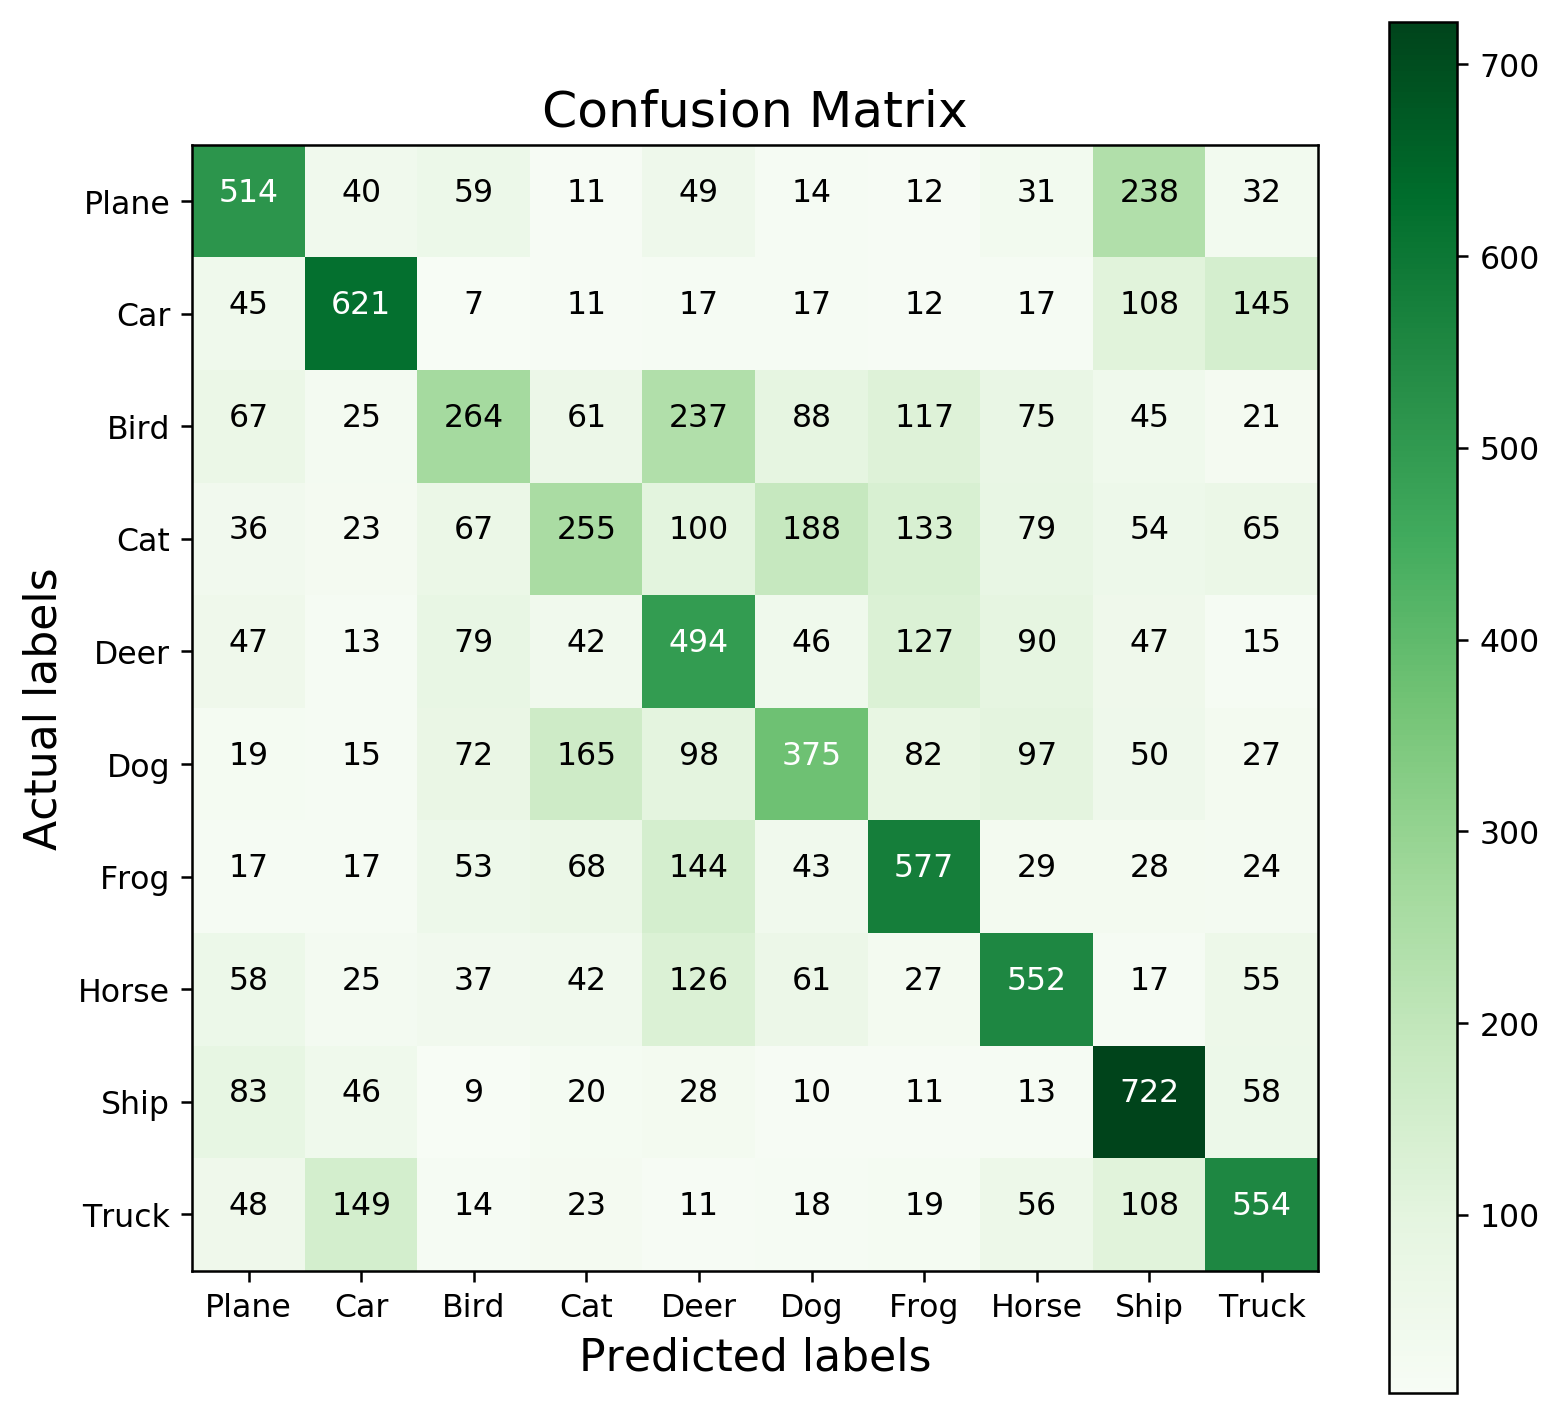

In [71]:
plt.figure(figsize=(8,8), dpi=227)
plt.imshow(conf_matrix, cmap='Greens')
plt.title('Confusion Matrix', fontsize = 16)
plt.ylabel('Actual labels', fontsize=14)
plt.xlabel('Predicted labels', fontsize=14)

tickmarks=np.arange(NR_CLASSES)
plt.yticks(ticks=tickmarks, labels=LABEL_NAMES)
plt.xticks(ticks=tickmarks, labels=LABEL_NAMES)

plt.colorbar()

for i,j in itertools.product(range(conf_matrix.shape[0]),range(conf_matrix.shape[1])):
    plt.text(j,i, f'{conf_matrix[i][j]}', horizontalalignment='center',
            color='white' if conf_matrix[i][j]>conf_matrix.max()/2 else 'black')

plt.show()

In [72]:
# True Positives

np.diag(conf_matrix)

array([514, 621, 264, 255, 494, 375, 577, 552, 722, 554], dtype=int64)

In [73]:
recall=np.diag(conf_matrix)/np.sum(conf_matrix, axis=1)
recall

array([0.514, 0.621, 0.264, 0.255, 0.494, 0.375, 0.577, 0.552, 0.722,
       0.554])

In [75]:
precision=np.diag(conf_matrix)/np.sum(conf_matrix, axis=0)
precision

array([0.55 , 0.638, 0.399, 0.365, 0.379, 0.436, 0.517, 0.531, 0.51 ,
       0.556])

In [81]:
# Average recall
avg_recall=np.mean(recall)
avg_precision=np.mean(precision)
f1_score = 2*avg_precision*avg_recall/(avg_precision+avg_recall)
print(f'Average Recall of the Model 2 is {avg_recall:0.2%}')
print(f'Average Precision of the Model 2 is {avg_precision:0.2%}')
print(f'F1 score for the Model 2 is {f1_score:0.2%}')


Average Recall of the Model 2 is 49.28%
Average Precision of the Model 2 is 48.81%
F1 score for the Model 2 is 49.04%
